Credits/Course URL: https://www.udemy.com/course/machinelearning/

## Polynomial Linear Regression

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#### Importing the dataset

In [2]:
data = pd.read_csv(r'E:\Github\Datasets\Position_Salaries.csv')

In [3]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


<AxesSubplot: xlabel='Salary', ylabel='Count'>

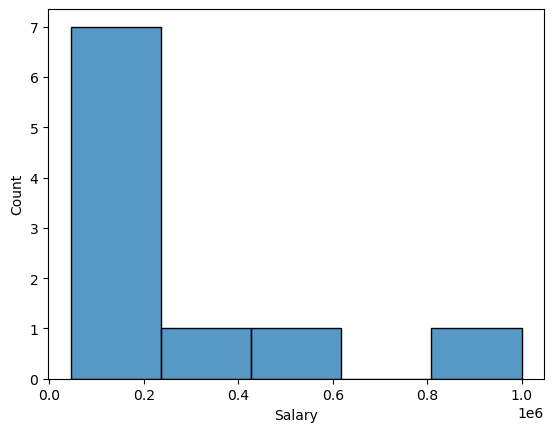

In [4]:
sns.histplot(data = data, x = 'Salary', bins = 5)

<AxesSubplot: xlabel='Level', ylabel='count'>

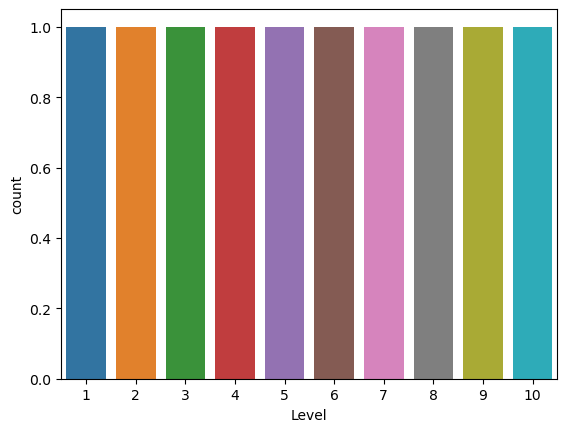

In [5]:
sns.countplot(data = data, x = 'Level')

#### Splitting of the dataset

In [17]:
X = data['Level'].values.reshape(-1, 1)
y = data['Salary'].values

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#### Linear Regression Model

In [28]:
linear_model = LinearRegression()

In [29]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [30]:
y_pred_train = linear_model.predict(X_train)
y_pred_test = linear_model.predict(X_test)

In [60]:
mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r_squared_train = r2_score(y_train, y_pred_train)


mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r_squared_test = r2_score(y_test, y_pred_test)

In [61]:
print(f'Mean Absolute Error (Train): {round(mae_train,2)}')
print(f'Mean Absolute Error (Test): {round(mae_test,2)}\n')

print(f'Root Mean Squared Error (Train): {round(rmse_train,2)}')
print(f'Root Mean Squared Error (Test): {round(rmse_test,2)}\n')

print(f'R Squared (Train): {round(r_squared_train,2)}')
print(f'R Squared (Test): {round(r_squared_test,2)}')

Mean Absolute Error (Train): 157343.44
Mean Absolute Error (Test): 29598.83

Root Mean Squared Error (Train): 182120.48
Root Mean Squared Error (Test): 32689.44

R Squared (Train): 0.62
R Squared (Test): 0.98


In [44]:
def rmse(actual, predicted):
    return np.sqrt(mean_squared_error(y_train, y_pred_train))

In [65]:
def get_prediction_metrics(y_actual_train, y_pred_train, y_actual_test, y_pred_test):
    
    train_metrics = dict()
    test_metrics = dict()
    
    # Getting training metrics
    for metric in [mean_absolute_error, mean_squared_error, rmse, r2_score]:
        train_metrics[metric.__name__+'_(train)'] = round(metric(y_actual_train, y_pred_train),2)
    
    # Getting test metrics
    for metric in [mean_absolute_error, mean_squared_error, rmse, r2_score]:
        test_metrics[metric.__name__+'_(test)'] = round(metric(y_actual_test, y_pred_test),2)
    
    # Printing the values
    for metric in [mean_absolute_error, mean_squared_error, rmse, r2_score]:
        print(f"\n{metric.__name__+'_(train)'}: {train_metrics[metric.__name__+'_(train)']}")
        print(f"{metric.__name__+'_(test)'}: {test_metrics[metric.__name__+'_(test)']}")
    
    return train_metrics, test_metrics

In [59]:
pred_metrics = get_prediction_metrics(y_actual_train = y_train, 
                                      y_pred_train = y_pred_train, 
                                      y_actual_test = y_test, 
                                      y_pred_test = y_pred_test)

mean_absolute_error_(train): 157343.44
mean_absolute_error_(test): 29598.83


mean_squared_error_(train): 33167869373.78
mean_squared_error_(test): 1068599327.51


rmse_(train): 182120.48
rmse_(test): 182120.48


r2_score_(train): 0.62
r2_score_(test): 0.98




In [56]:
pred_metrics

({'mean_absolute_error_(train)': 157343.44,
  'mean_squared_error_(train)': 33167869373.78,
  'rmse_(train)': 182120.48,
  'r2_score_(train)': 0.62},
 {'mean_absolute_error_(test)': 29598.83,
  'mean_squared_error_(test)': 1068599327.51,
  'rmse_(test)': 182120.48,
  'r2_score_(test)': 0.98})

#### Polynomial Linear Regression Model

In [34]:
poly_reg = PolynomialFeatures(degree=2)

In [35]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [36]:
X_train_poly

array([[  1.,   1.,   1.],
       [  1.,   5.,  25.],
       [  1.,  10., 100.],
       [  1.,   4.,  16.],
       [  1.,   6.,  36.],
       [  1.,   8.,  64.],
       [  1.,   7.,  49.],
       [  1.,   2.,   4.]])

In [37]:
X_test_poly

array([[ 1.,  9., 81.],
       [ 1.,  3.,  9.]])

In [38]:
poly_linear_model = LinearRegression()

In [39]:
poly_linear_model.fit(X_train_poly, y_train)

LinearRegression()

In [40]:
y_pred_train_poly = poly_linear_model.predict(X_train_poly)
y_pred_test_poly = poly_linear_model.predict(X_test_poly)

In [66]:
poly_reg_preds = get_prediction_metrics( y_actual_train = y_train,
                        y_pred_train = y_pred_train_poly,
                        y_actual_test = y_test,
                        y_pred_test = y_pred_test_poly)


mean_absolute_error_(train): 67130.84
mean_absolute_error_(test): 111037.84

mean_squared_error_(train): 5879726067.61
mean_squared_error_(test): 14254734714.33

rmse_(train): 182120.48
rmse_(test): 182120.48

r2_score_(train): 0.93
r2_score_(test): 0.71


In [67]:
poly_reg_preds

({'mean_absolute_error_(train)': 67130.84,
  'mean_squared_error_(train)': 5879726067.61,
  'rmse_(train)': 182120.48,
  'r2_score_(train)': 0.93},
 {'mean_absolute_error_(test)': 111037.84,
  'mean_squared_error_(test)': 14254734714.33,
  'rmse_(test)': 182120.48,
  'r2_score_(test)': 0.71})

#### Results visualization

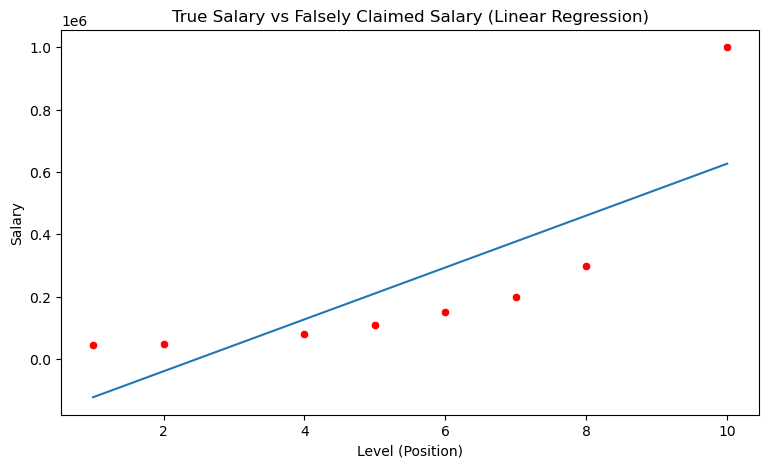

In [72]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=X_train.ravel(),y=y_train, color = 'red')
sns.lineplot(x = X_train.ravel(), y = y_pred_train)
plt.title("True Salary vs Falsely Claimed Salary (Linear Regression)")
plt.xlabel("Level (Position)")
plt.ylabel("Salary");

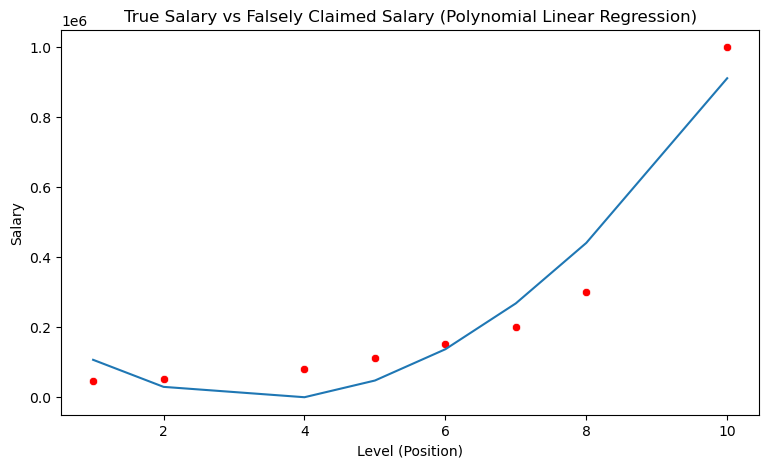

In [73]:
plt.figure(figsize=(9,5))
sns.scatterplot(x=X_train.ravel(),y=y_train, color = 'red')
sns.lineplot(x = X_train.ravel(), y = y_pred_train_poly)
plt.title("True Salary vs Falsely Claimed Salary (Polynomial Linear Regression)")
plt.xlabel("Level (Position)")
plt.ylabel("Salary");

#### Making predictions

In [74]:
user_input = input('Enter the position level (as integer): ')

Enter the position level (as integer): 3


In [76]:
def get_predictions_linear_model(user_input):
    try:
        user_input = int(user_input)
    except:
        return "Invalid input! Please try again with integer as input."
    
    user_input = np.array(user_input).reshape(-1,1)
    
    return linear_model.predict(user_input)

In [77]:
get_predictions_linear_model(user_input)

array([44275.9295499])

In [79]:
def get_predictions_polynomial_linear_model(user_input):
    try:
        user_input = int(user_input)
    except:
        return "Invalid input! Please try again with integer as input."
    
    user_input = np.array(user_input).reshape(-1,1)
    user_input = poly_reg.transform(user_input)
    return poly_linear_model.predict(user_input)

In [80]:
get_predictions_polynomial_linear_model(user_input)

array([-7159.23984273])